In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns


In [2]:
iris = pd.read_csv('../Datasets/iris.csv')
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:

iris = iris.drop('Id',axis=1)
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
## lets just take two columns for pruning
iris = iris.drop(['PetalLengthCm','PetalWidthCm'],axis=1)
iris.head()

SepalLengthCm  SepalWidthCm      Species
0            5.1           3.5  Iris-setosa
1            4.9           3.0  Iris-setosa
2            4.7           3.2  Iris-setosa
3            4.6           3.1  Iris-setosa
4            5.0           3.6  Iris-setosa

In [5]:
X = iris.drop('Species',axis=1)
y = iris.Species

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)


In [7]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=2)   
model_tree.fit(X_train,y_train)
y_pred_tree = model_tree.predict(X_train)
y_pred_test = model_tree.predict(X_test)


In [8]:
print(model_tree.get_depth())

13


In [9]:
print(accuracy_score(y_train,y_pred_tree))
print(accuracy_score(y_test,y_pred_test))


## clearly its overfitting

0.9333333333333333
0.6666666666666666


In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (18,18))
plot_tree(model_tree,filled=True)

[Text(5564.613970588235, 13104.642857142857, 'X[0] <= 5.45\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(2051.470588235294, 12133.928571428572, 'X[1] <= 2.8\ngini = 0.309\nsamples = 38\nvalue = [31, 6, 1]'),
 Text(1230.8823529411766, 11163.214285714286, 'X[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(820.5882352941177, 10192.5, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(410.29411764705884, 9221.785714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(1230.8823529411766, 9221.785714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(1641.1764705882354, 10192.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(2872.0588235294117, 11163.214285714286, 'X[0] <= 5.3\ngini = 0.061\nsamples = 32\nvalue = [31, 1, 0]'),
 Text(2461.764705882353, 10192.5, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(3282.3529411764707, 10192.5, 'X[1] <= 3.2\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(2872.05882352

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.38      0.38      0.38         8
 Iris-virginica       0.44      0.50      0.47         8

       accuracy                           0.67        30
      macro avg       0.61      0.60      0.60        30
   weighted avg       0.69      0.67      0.67        30



## Learning

Since we created a model that has no restriction, so it splitted till each leaf is pure.

in that way we got the max_depth for the tree.

now go on pruning till you go to the max_depth

## Pruning

In [19]:
max_depth = model_tree.get_depth()
max_depth

13

In [23]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer


tree_grid = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42),
    scoring = make_scorer(accuracy_score),
    param_grid = ParameterGrid({
        "max_depth":[np.arange(3,max_depth+1,1)],
        'criterion':[['gini','entropy']],
    })

)


In [25]:
## training the model
tree_grid.fit(X_train,y_train)


## best parameters
tree_grid.best_params_

## gini with depth as 3

{'criterion': 'gini', 'max_depth': 3}

In [28]:
## training the model
model_tree_grid = DecisionTreeClassifier(random_state=42,max_depth=3,criterion="gini")   
model_tree_grid.fit(X_train,y_train)
y_pred_tree = model_tree.predict(X_train)
y_pred_test = model_tree.predict(X_test)

print(accuracy_score(y_train,y_pred_tree))
print(accuracy_score(y_test,y_pred_test))

## see the accuracy got improved on the test dataset
## impressive


0.8166666666666667
0.7666666666666667


[Text(502.20000000000005, 856.1700000000001, 'X[0] <= 5.45\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(251.10000000000002, 611.55, 'X[1] <= 2.8\ngini = 0.309\nsamples = 38\nvalue = [31, 6, 1]'),
 Text(125.55000000000001, 366.93000000000006, 'X[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(62.775000000000006, 122.30999999999995, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(188.32500000000002, 122.30999999999995, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(376.65000000000003, 366.93000000000006, 'X[0] <= 5.3\ngini = 0.061\nsamples = 32\nvalue = [31, 1, 0]'),
 Text(313.875, 122.30999999999995, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(439.42500000000007, 122.30999999999995, 'gini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(753.3000000000001, 611.55, 'X[0] <= 6.25\ngini = 0.554\nsamples = 82\nvalue = [5, 36, 41]'),
 Text(627.75, 366.93000000000006, 'X[1] <= 3.45\ngini = 0.523\nsamples = 41\nvalue = [5, 26, 10]'),
 Text(5

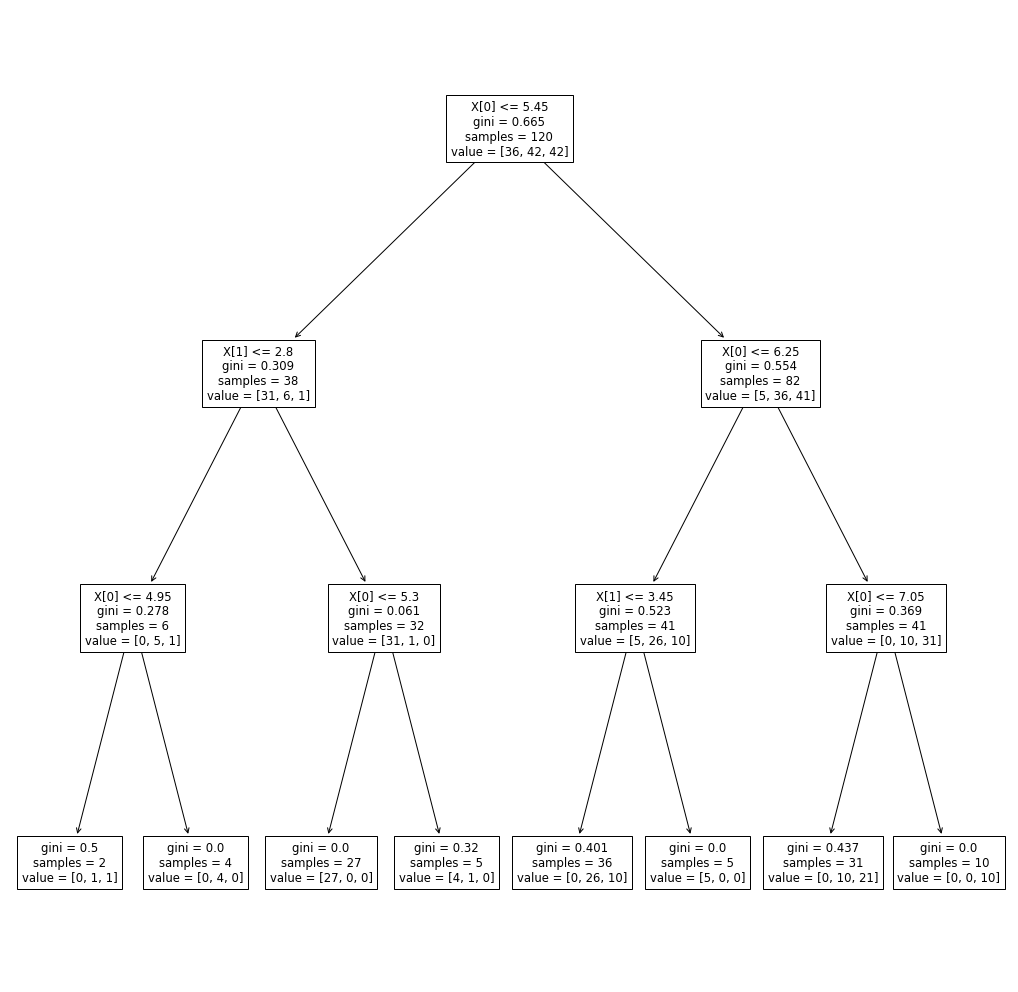

In [30]:
### plotting the tree

plt.figure(figsize=(18,18))
plot_tree(model_tree_grid)

## Pruining

ccp alpha is the cost complexity paramter.

As the alpha increases, more of the tree is pruned, which increases the total impurity of the leaves.

While pruning we look into alpha: cost complexity parameter.



To get an idea of what values of ccp_alpha will work to reduce the tree size, scikit-learn provides a functioncost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.

In [32]:
## lets try it on the full tree

path = model_tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.0028125 , 0.00555556, 0.01311303, 0.05849142,
       0.0677723 , 0.07337398, 0.18894095])

In [35]:
prunning_tree_grid = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42),
    scoring = make_scorer(accuracy_score),
    param_grid = ParameterGrid({
        'ccp_alpha':[[alpha] for alpha in alphas],
    })
)

In [38]:
prunning_tree_grid.fit(X_train,y_train)
prunning_tree_grid.best_params_

{'ccp_alpha': 0.013113034356150022}

In [39]:
prunning_tree_grid.best_score_

## training test score

0.775

In [41]:
y_pred = prunning_tree_grid.predict(X_test)
print(accuracy_score(y_pred,y_test))

print(classification_report(y_test,y_pred))

0.7666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.57      0.50      0.53         8
 Iris-virginica       0.60      0.75      0.67         8

       accuracy                           0.77        30
      macro avg       0.72      0.73      0.72        30
   weighted avg       0.78      0.77      0.77        30



In [141]:
## for alpha between 0.04 to 0.05: max accuracy is there

model_tree = DecisionTreeClassifier(random_state=2,ccp_alpha=0.045)   
model_tree.fit(X_train,y_train)
y_pred_tree = model_tree.predict(X_train)
y_pred_test = model_tree.predict(X_test)

print(accuracy_score(y_train,y_pred_tree))
print(accuracy_score(y_test,y_pred_test))

0.8166666666666667
0.7666666666666667
